# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataset/Linear Regression.xlsx')
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
data.duplicated().sum()

266

In [4]:
data.drop_duplicates(inplace = True)

In [5]:
data.shape

(21347, 5)

In [6]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

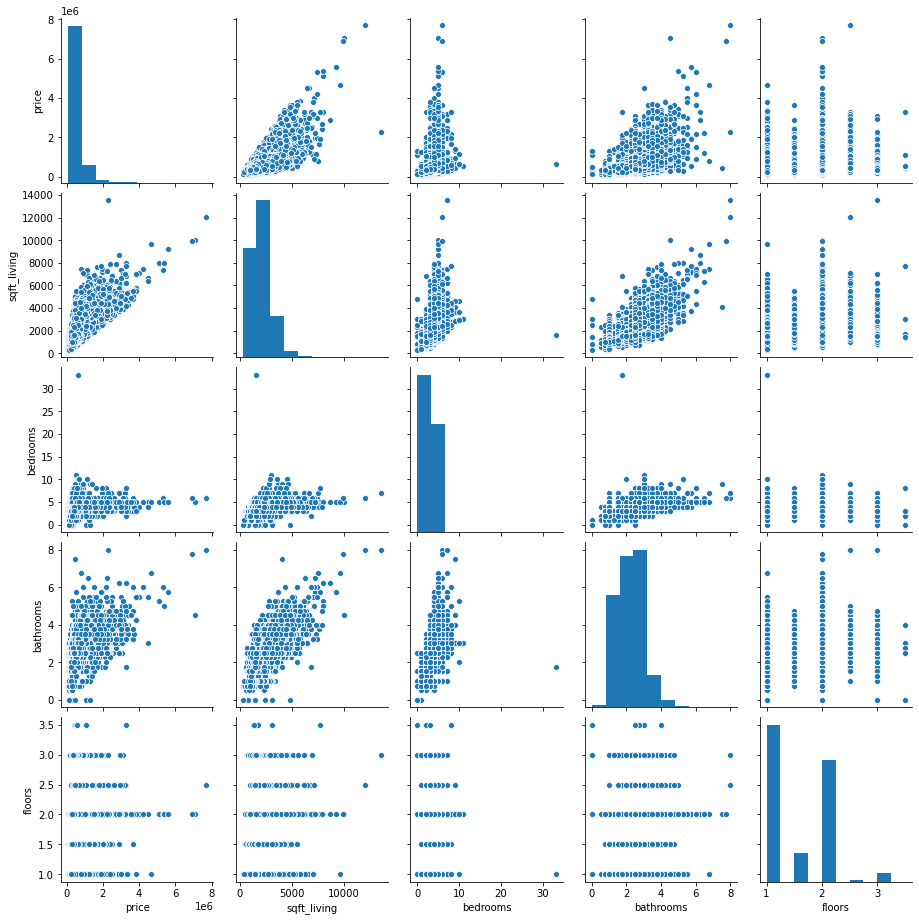

In [7]:
sns.pairplot(data)

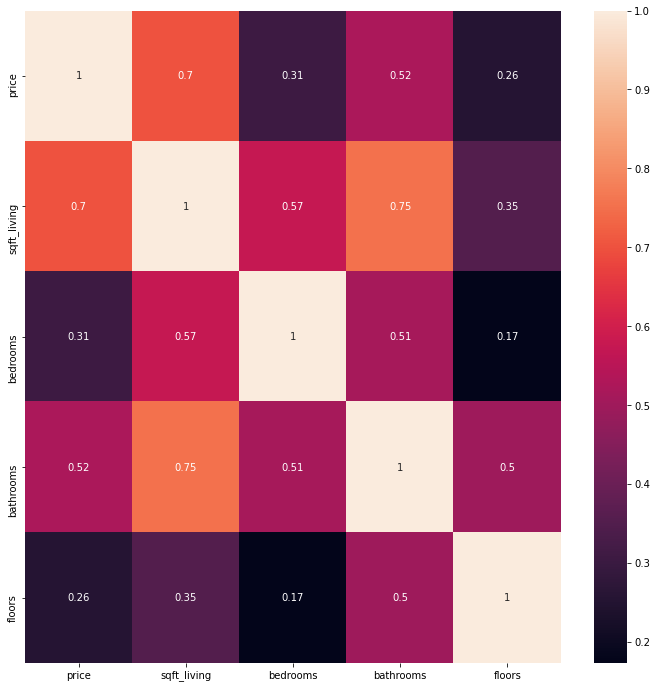

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True)

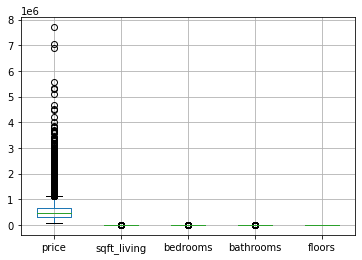

In [9]:
data.boxplot()

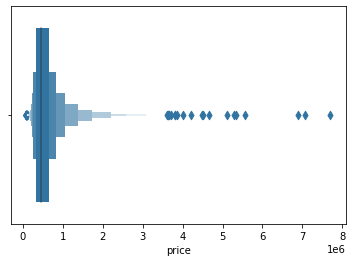

In [10]:
sns.boxenplot(data.price)

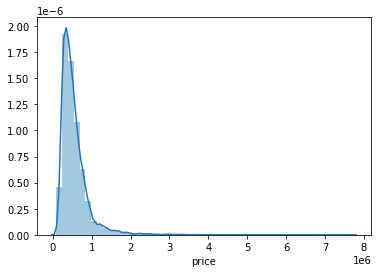

In [50]:
sns.distplot(data.price)

### TREATING OUTLIERS

In [60]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price          324100.00
sqft_living      1120.00
bedrooms            1.00
bathrooms           0.75
floors              1.00
dtype: float64


In [61]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(19415, 5)

In [62]:
data_out.describe().T

,count,mean,std,min,25%,50%,75%,max
price,19415.0,472853.586660,203391.399886,78000.00,315000.0,435000.0,597875.0,1131000.0
sqft_living,19415.0,1946.545094,712.439543,440.00,1400.0,1840.0,2400.0,4230.0
bedrooms,19415.0,3.302550,0.783668,2.00,3.0,3.0,4.0,5.0
bathrooms,19415.0,2.027968,0.661109,0.75,1.5,2.0,2.5,3.5
floors,19415.0,1.472238,0.536359,1.00,1.0,1.0,2.0,3.5


### CORRELATION

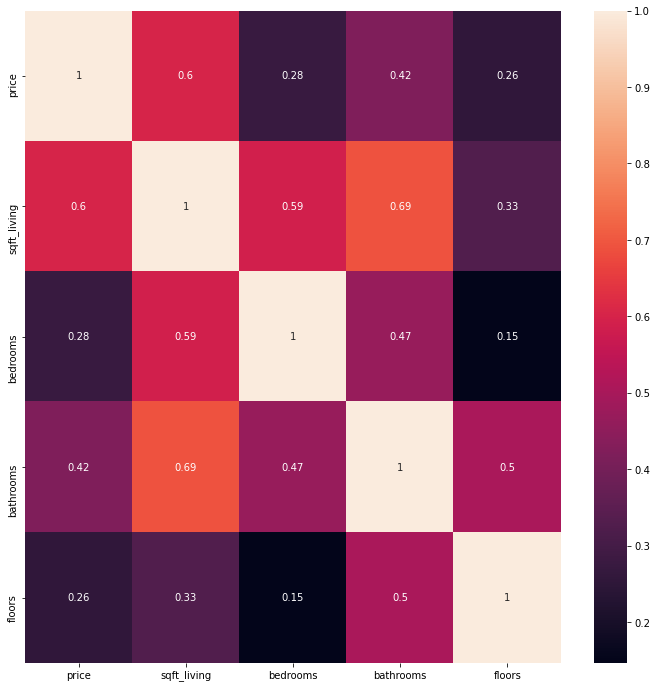

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(data_out.corr(), annot = True)

### LINEAR REGRESSION MODEL BETWEEN PRICE AND BEDROOMS 

In [96]:
X = data_out.iloc[:, :1]
y = data_out.iloc[:,3:4]

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [109]:
linreg.fit(X_train, y_train)

LinearRegression()

In [110]:
lin_reg.coef_

array([[129310.50314529]])

In [111]:
lin_reg.intercept_

array([211022.07919771])

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
predict = lin_reg.predict(y_test)

In [114]:
RMSE = np.sqrt(mean_squared_error(x_test, apred))
r_square = r2_score(x_test, apred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.17499180829283056
The RMSE value is: 185239.7692313484


In [116]:
from sklearn.model_selection import cross_val_score
cv_5_results = cross_val_score(lin_reg, x, y, 
                               cv=5, 
                               scoring='neg_mean_squared_error')

In [117]:
cv_5_results

array([-0.35641656, -0.3558654 , -0.34737523, -0.35408086, -0.40656155])

### LINEAR REGRESSION MODEL BETWEEN PRICE AND BATHROOMS

In [124]:
y1 = data_out.iloc[:,2:3]

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test  = train_test_split(X, y1, test_size = 0.2, random_state = 42)

In [126]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [127]:
lin_reg.fit(X_train, y1_train)

LinearRegression()

In [128]:
lin_reg.coef_

array([[1.0575687e-06]])

In [129]:
lin_reg.intercept_

array([2.80153589])

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
pred = lin_reg.predict(y1_test)

In [134]:
RMSE = np.sqrt(mean_squared_error(X_test, pred))
r_square = r2_score(X_test, pred)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: -5.415537122010968
The RMSE value is: 520125.2776636611


### LINEAR REGRESSION MODEL BETWEEN PRICE AND FLOORS

In [135]:
y2 = data_out.iloc[:,4:]

In [136]:
from sklearn.model_selection import train_test_split
y2_train, y2_test, x_train, x_test = train_test_split(y2 ,x, test_size = 0.2, random_state = 2)

In [137]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [138]:
lin_reg.fit(y2_train, x_train)

LinearRegression()

In [139]:
lin_reg.coef_

array([[99186.05364503]])

In [140]:
lin_reg.intercept_

array([326968.87707274])

In [141]:
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
pred1 = lin_reg.predict(y2_test)

In [143]:
RMSE = np.sqrt(mean_squared_error(x_test, pred1))
r_square = r2_score(x_test, pred1)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.054132106802878055
The RMSE value is: 197030.65523786153


### LINEAR REGRESSION MODEL BETWEEN PRICE AND SQFT_LIVING

In [144]:
y3 = data_out.iloc[:,1:2]

In [145]:
from sklearn.model_selection import train_test_split
y3_train, y3_test, x_train, x_test = train_test_split(y3 ,x, test_size = 0.2, random_state = 2)

In [146]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [147]:
lin_reg.fit(y3_train, x_train)

LinearRegression()

In [148]:
lin_reg.coef_

array([[171.81446013]])

In [149]:
lin_reg.intercept_

array([138407.65862102])

In [150]:
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
pred2 = lin_reg.predict(y3_test)

In [152]:
RMSE = np.sqrt(mean_squared_error(x_test, pred2))
r_square = r2_score(x_test, pred2)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.3489118769513109
The RMSE value is: 163470.14439501343


## Inferences

<b>Simple Linear Regression b/w Price and Bedrooms: </b>

 - Coefficient is found to be 129310 , which tells us that the average value of a house increases by $129,310 on                   average of each additional of number of bedrooms.
          
 - Intercept is 211022, indicates that for houses within a range of bedrooms observed. $211022 is the portion of the house price is not explained by number of bedrooms.
        
 - RMSE is found to be 185239 and R<sup>2</sup> 0.17.
    
  

<b>Simple Linear Regression b/w Price and Bathrooms:</b>
  
-  Coefficient is found to be 126220 , which tells us that the average value of a house increases by $126,220 on                   average of each additional of bathrooms.
  
-  Intercept is 115856, indicates that for houses within a range of bedrooms observed. $11,5856 is the portion of the house      price is not explained by number of bathrooms.

-  RMSE is found to be $371822 and R<sup>2</sup> 0.071.

<b>Simple Linear Regression b/w Price and Floors:</b>
 
-  Coefficient is found to be 179992 , which tells us that the average value of a house increases by $17,9992 on                   average of each additional of floors.
        
-  Intercept is 272454, indicates that for houses within a range of bedrooms observed. $27,2454 is the portion of the house      price is not explained by number of floors.
  
-  RMSE is found to be $376773 and R<sup>2</sup> 0.046    

<b>Simple Linear Regression b/w Price and Sqft_living:</b>

 - Coefficient is found to be 171 , which tells us that the average value of a house increases by $171 on average of each  additional of one square of foot.
  
 - RMSE is found to be $163470 and R<sup>2</sup> 0.34